In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/concertriccir2.csv')

In [3]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [4]:
df.columns = ['X','Y','class']

In [5]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


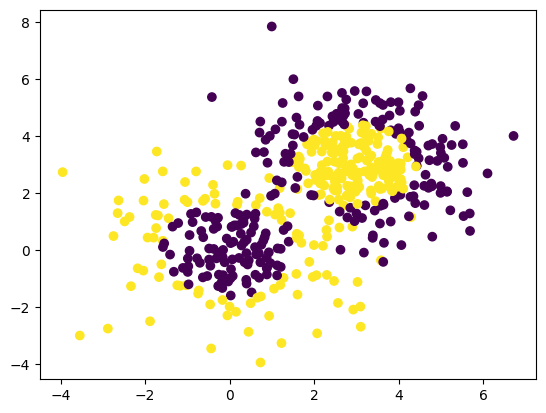

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [8]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history1 = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4675 - loss: 0.8571 - val_accuracy: 0.5700 - val_loss: 0.7360
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4668 - loss: 0.8167 - val_accuracy: 0.5700 - val_loss: 0.7169
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4640 - loss: 0.7965 - val_accuracy: 0.5700 - val_loss: 0.7022
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4220 - loss: 0.7776 - val_accuracy: 0.5400 - val_loss: 0.6905
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3944 - loss: 0.7790 - val_accuracy: 0.4200 - val_loss: 0.6819
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3305 - loss: 0.7654 - val_accuracy: 0.3900 - val_loss: 0.6741
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3833 - loss: 0.7423 - val_accuracy: 0.4100 - val_loss: 0.6684
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3793 - loss: 0.7404 - val_accuracy: 0.4500

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


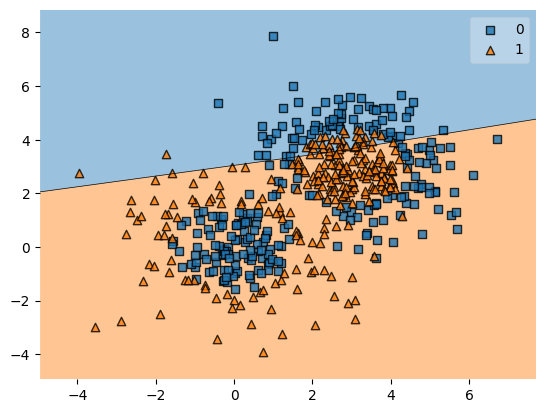

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model)
plt.show()

# Using Batch Normalization

In [12]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

8 parameters in batch normalization layer is because of 4 trainable parameters for each neuron. As there are 2 neurons, therefore 2*4 = 8.
Each neuron has 2 non-trainable parameters, each layer has 2 neurons, there are 2 BN layers, therefore 2*2*2 = 8 non-trainable params.

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history2 = model.fit(X,y, epochs=100, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4310 - loss: 0.7480 - val_accuracy: 0.5700 - val_loss: 0.7112
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4715 - loss: 0.7397 - val_accuracy: 0.5500 - val_loss: 0.7026
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4671 - loss: 0.7223 - val_accuracy: 0.5500 - val_loss: 0.6972
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4722 - loss: 0.7188 - val_accuracy: 0.4900 - val_loss: 0.6934
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4748 - loss: 0.7245 - val_accuracy: 0.4500 - val_loss: 0.6899
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5381 - loss: 0.6935 - val_accuracy: 0.4400 - val_loss: 0.6873
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5121 - loss: 0.7041 - val_accuracy: 0.4500 - val_loss: 0.6844
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4867 - loss: 0.7049 - val_accuracy: 0.4300 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


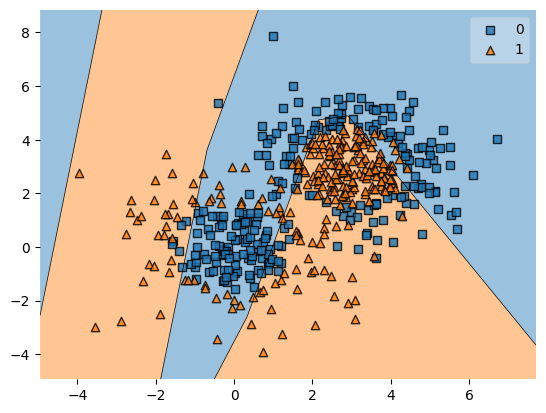

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model)
plt.show()

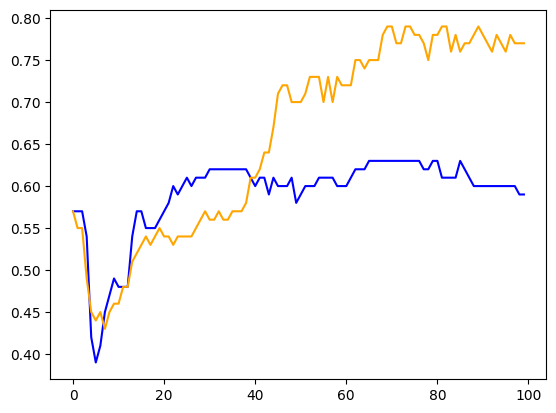

In [16]:
plt.plot(history1.history['val_accuracy'], color='blue')
plt.plot(history2.history['val_accuracy'], color='orange')
plt.show()